https://www.tensorflow.org/tutorials/quickstart/beginner

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


In [52]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [53]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [54]:
x_train.shape

(60000, 28, 28)

In [55]:
y_train.shape

(60000,)

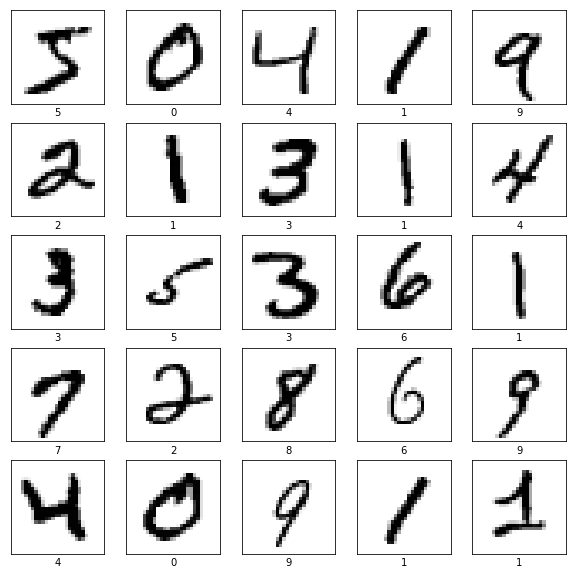

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [57]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

In [58]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.08720057,  0.22621496,  0.03838794,  0.05964511,  0.11056876,
        -0.10274213,  0.1075165 ,  0.0889806 , -0.10537498,  0.11833303]],
      dtype=float32)

In [59]:
tf.nn.softmax(predictions).numpy()

array([[0.10200198, 0.11721462, 0.09714256, 0.09922964, 0.10441365,
        0.0843563 , 0.10409544, 0.10218371, 0.0841345 , 0.1052275 ]],
      dtype=float32)

In [60]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [61]:
loss_fn(y_train[:1], predictions).numpy()

2.4727056

In [62]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [63]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 765us/step - loss: 0.2464 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.1162 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.0867 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 1s 760us/step - loss: 0.0704 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 1s 762us/step - loss: 0.0611 - accuracy: 0.9820


In [64]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0936 - accuracy: 0.9742


[0.09360209852457047, 0.9742000102996826]

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [66]:
model.save_weights('digit/ann_do')

In [67]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

In [68]:
model_new.load_weights('digit/ann_do')

In [69]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [70]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.9658572e-12, 2.2474405e-08, 9.1167912e-08, 6.3048189e-09,
        8.3827567e-09, 1.8060257e-10, 1.6207753e-16, 9.9999118e-01,
        3.5956542e-09, 8.7118315e-06],
       [7.6884489e-06, 3.1111802e-05, 9.9923611e-01, 4.6903559e-04,
        3.9273946e-05, 8.2792940e-06, 1.4659823e-05, 1.5475333e-04,
        3.7693600e-05, 1.4688126e-06],
       [3.3356375e-07, 9.9940431e-01, 2.3977750e-06, 4.5349822e-07,
        4.6207965e-06, 1.9204341e-05, 4.4913485e-04, 3.3292908e-05,
        8.5517735e-05, 7.3474257e-07],
       [9.9941742e-01, 9.2092660e-11, 9.3084664e-06, 9.0327767e-08,
        4.8604001e-05, 3.9103753e-07, 2.9001636e-05, 8.4330217e-08,
        7.1520219e-07, 4.9436471e-04],
       [6.9544576e-08, 1.1967786e-06, 1.0359291e-06, 2.6404553e-08,
        9.9701238e-01, 8.7755643e-07, 6.6112193e-07, 4.3286600e-06,
        2.8783027e-06, 2.9765372e-03]], dtype=float32)>

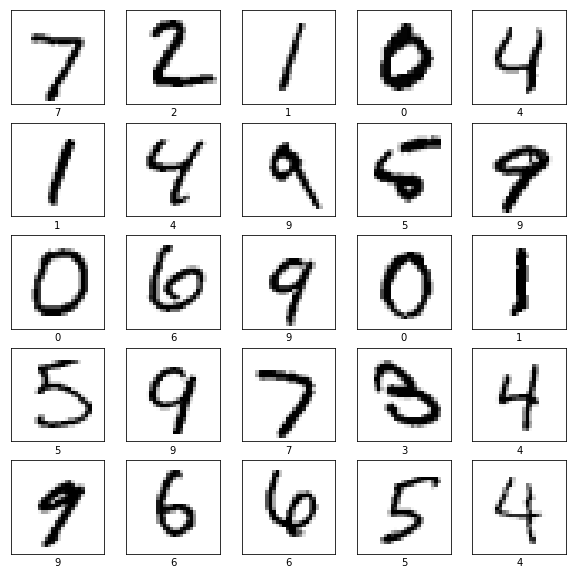

In [71]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [72]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [73]:
predictions = probability_model.predict(x_test)

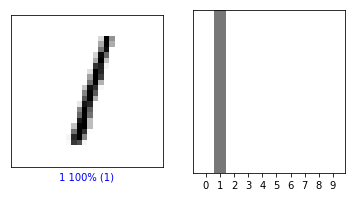

In [74]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

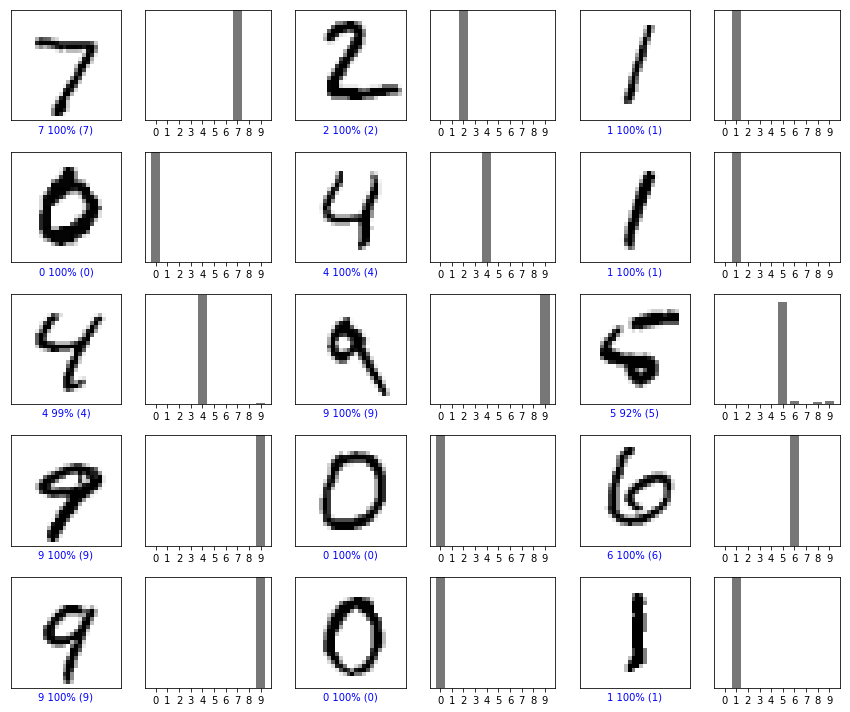

In [75]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
